In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, AveragePooling2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
X_train = np.loadtxt('/home/batuhan/data/cnndata/input.csv', delimiter = ',')
Y_train = np.loadtxt('/home/batuhan/data/cnndata/labels.csv', delimiter = ',')

X_test = np.loadtxt('/home/batuhan/data/cnndata/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/home/batuhan/data/cnndata/labels_test.csv', delimiter=',')

In [74]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train / 255.0
X_test = X_test / 255.0

print(len(X_train))


2000


In [75]:
idx = random.randint(0,len(X_train))

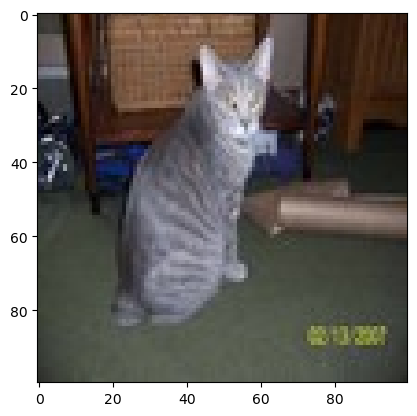

In [76]:
plt.imshow(X_train[idx, :])
plt.show()

In [77]:
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    # Rotasyon: Hayvanın farklı açılardan görünümünü simüle eder
    rotation_range=20,
    
    # Kaydırma: Hayvanın resimde farklı konumlarda olmasını simüle eder
    width_shift_range=0.2,
    height_shift_range=0.2,
    
    # Yakınlaştırma: Farklı mesafelerden çekilmiş gibi görünüm sağlar
    zoom_range=0.3,
    
    # Parlaklık değişimi: Farklı ışık koşullarını simüle eder
    brightness_range=[0.8, 1.2],
    
    # Kesme (shear): Hafif perspektif değişiklikleri ekler
    shear_range=0.1,
    
    # Kısa kenarı doldurmak için kullanılacak yöntem
    fill_mode='nearest',
    
    # Normalizasyon: [0-1] aralığında
    rescale=None  # Verilerinizi zaten normalize ettiğiniz için gerek yok
)

datagen.fit(X_train)  # X_train: (num_samples, 100, 100, 3)

print(len(X_train))
"""

"\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator\n\ndatagen = ImageDataGenerator(\n    # Rotasyon: Hayvanın farklı açılardan görünümünü simüle eder\n    rotation_range=20,\n\n    # Kaydırma: Hayvanın resimde farklı konumlarda olmasını simüle eder\n    width_shift_range=0.2,\n    height_shift_range=0.2,\n\n    # Yakınlaştırma: Farklı mesafelerden çekilmiş gibi görünüm sağlar\n    zoom_range=0.3,\n\n    # Parlaklık değişimi: Farklı ışık koşullarını simüle eder\n    brightness_range=[0.8, 1.2],\n\n    # Kesme (shear): Hafif perspektif değişiklikleri ekler\n    shear_range=0.1,\n\n    # Kısa kenarı doldurmak için kullanılacak yöntem\n    fill_mode='nearest',\n\n    # Normalizasyon: [0-1] aralığında\n    rescale=None  # Verilerinizi zaten normalize ettiğiniz için gerek yok\n)\n\ndatagen.fit(X_train)  # X_train: (num_samples, 100, 100, 3)\n\nprint(len(X_train))\n"

In [ ]:
x = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(input_layer)
x = MaxPool2D((3,3), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (1,1), padding='same', activation='relu')(x)
x = Conv2D(192, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D((3,3), strides=(2,2), padding='same')(x)
x = inception_block(x, 128, 128, 192, 32, 96, 64)
x = MaxPool2D((3,3), strides=(2,2), padding='same')(x)
x = inception_block(x, 192, 96, 208, 16, 48, 64)
x = inception_block(x, 160, 112, 224, 24, 64, 64)
x = inception_block(x, 128, 128, 256, 24, 64, 64)
x = inception_block(x, 112, 144, 288, 32, 64, 64)
x = inception_block(x, 256, 160, 320, 32, 128, 128)
x = MaxPool2D((3,3), strides=(2,2), padding='same')(x)
x = inception_block(x, 256, 160, 320, 32, 128, 128)
x = inception_block(x, 384, 192, 384, 48, 128, 128)
x = AveragePooling2D(pool_size=(4,5), strides=(1,1), padding='valid')(x)
x = Flatten()(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
3
100
3
2
3
2
3
2

In [79]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Kullanılan cihaz:", tf.test.gpu_device_name())

Kullanılan cihaz: /device:GPU:0


I0000 00:00:1756386382.670625    6922 gpu_device.cc:2022] Created device /device:GPU:0 with 10133 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [80]:
"""
model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, Y_test)
)
"""
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
61/63 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5358 - loss: 0.7730

2025-08-28 16:08:06.593792: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_20', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_22', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_26', 4 bytes spill stores, 4 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_28', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_reduce_fusion_30', 8 bytes spill stores, 8 bytes spill loads



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.5371 - loss: 0.7724

2025-08-28 16:08:09.321593: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3281_0', 8 bytes spill stores, 8 bytes spill loads

2025-08-28 16:08:09.469701: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3281_0', 100 bytes spill stores, 100 bytes spill loads

2025-08-28 16:08:09.519637: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3281', 204 bytes spill stores, 204 bytes spill loads



63/63 ━━━━━━━━━━━━━━━━━━━━ 111s 790ms/step - accuracy: 0.5765 - loss: 0.7530 - val_accuracy: 0.5000 - val_loss: 0.7337
Epoch 2/20
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6165 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.7358
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6165 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.7358
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6355 - loss: 0.6557 - val_accuracy: 0.5000 - val_loss: 0.8333
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6355 - loss: 0.6557 - val_accuracy: 0.5000 - val_loss: 0.8333
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6555 - loss: 0.6284 - val_accuracy: 0.4900 - val_loss: 0.7940
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6555 - loss: 0.6284 - val_accuracy: 0.4900 - val_loss: 0.7940
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6780 - loss: 0.6242 - val_accuracy: 0.5075 

In [82]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5650 - loss: 1.1927
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5650 - loss: 1.1927


[1.1926838159561157, 0.5649999976158142]

'2.18.1'